Este proyecto busca comprobar la hipótesis de que Fernando Alonso es el piloto español con mejor rendimiento en la historia de la Fórmula 1, y partiendo de aquí intentaremos probar tambien que:

Alonso tiene un mejor rendimiento comparado con otros pilotos con los que haya competido (Hamilton, Verstappen, Pérez...).

El rendimiento de los pilotos españoles en clasificación es inferior al rendimiento en carrera.

Fernando Alonso es el piloto más veterano actualmente en términos de longevidad y rendimiento competitivo.

Carlos Sainz Jr. ha tenido una progresión más constante que cualquier otro piloto español de F1.

Se utilizarán:
- Dataset histórico de Kaggle (1950-2020)
- API Ergast para datos hasta 2025

Kaggle F1 Dataset (1950-2020)
[Enlace](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020?select=circuits.csv)  
Ergast Developer API – para datos más actuales o específicos como clasificación, vueltas rápidas, edad, etc.  
[Enlace](https://ergast.com/mrd/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

Datos de Kaggle

In [2]:
drivers = pd.read_csv('Datos_csv/drivers.csv')
races = pd.read_csv('Datos_csv/races.csv')
results = pd.read_csv('Datos_csv/results.csv')
constructors = pd.read_csv('Datos_csv/constructors.csv')
circuits = pd.read_csv('Datos_csv/circuits.csv')
status = pd.read_csv('Datos_csv/status.csv')
lap_times = pd.read_csv('Datos_csv/lap_times.csv')
pit_stops = pd.read_csv('Datos_csv/pit_stops.csv')
qualifying = pd.read_csv('Datos_csv/qualifying.csv')

In [3]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     861 non-null    int64 
 1   driverRef    861 non-null    object
 2   number       861 non-null    object
 3   code         861 non-null    object
 4   forename     861 non-null    object
 5   surname      861 non-null    object
 6   dob          861 non-null    object
 7   nationality  861 non-null    object
 8   url          861 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.7+ KB


In [4]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [5]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1125 non-null   int64 
 1   year         1125 non-null   int64 
 2   round        1125 non-null   int64 
 3   circuitId    1125 non-null   int64 
 4   name         1125 non-null   object
 5   date         1125 non-null   object
 6   time         1125 non-null   object
 7   url          1125 non-null   object
 8   fp1_date     1125 non-null   object
 9   fp1_time     1125 non-null   object
 10  fp2_date     1125 non-null   object
 11  fp2_time     1125 non-null   object
 12  fp3_date     1125 non-null   object
 13  fp3_time     1125 non-null   object
 14  quali_date   1125 non-null   object
 15  quali_time   1125 non-null   object
 16  sprint_date  1125 non-null   object
 17  sprint_time  1125 non-null   object
dtypes: int64(4), object(14)
memory usage: 158.3+ KB


In [6]:
spanish_drivers = drivers[drivers['nationality'] == 'Spanish']
#print(spanish_drivers)
spanish_drivers


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
36,37,rosa,\N,DLR,Pedro,de la Rosa,1971-02-24,Spanish,http://en.wikipedia.org/wiki/Pedro_de_la_Rosa
47,48,gene,\N,\N,Marc,Gené,1974-03-29,Spanish,http://en.wikipedia.org/wiki/Marc_Gen%C3%A9
152,153,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari
158,159,sala,\N,\N,Luis,Pérez-Sala,1959-05-15,Spanish,http://en.wikipedia.org/wiki/Luis_Perez-Sala
166,167,campos,\N,\N,Adrián,Campos,1960-06-17,Spanish,http://en.wikipedia.org/wiki/Adri%C3%A1n_Campos
207,208,villota,\N,\N,Emilio,de Villota,1946-07-26,Spanish,http://en.wikipedia.org/wiki/Emilio_de_Villota
278,279,zapico,\N,\N,Emilio,Zapico,1944-05-27,Spanish,http://en.wikipedia.org/wiki/Emilio_Zapico
338,339,roig,\N,\N,Alex,Soler-Roig,1932-10-29,Spanish,http://en.wikipedia.org/wiki/Alex_Soler-Roig
504,504,creus,\N,\N,Antonio,Creus,1924-10-28,Spanish,http://en.wikipedia.org/wiki/Antonio_Creus


In [7]:
merged = pd.merge(results, drivers, on='driverId')
spanish_stats = merged[merged['driverId'].isin(spanish_drivers['driverId'])]
spanish_summary = spanish_stats.groupby('surname')[['points', 'positionOrder']].agg(['sum', 'count'])
#print(spanish_summary)
spanish_summary

points       positionOrder      
                sum count           sum count
surname                                      
Alguersuari    31.0    46           639    46
Alonso       2329.0   404          3431   404
Campos          0.0    21           438    21
Creus           0.0     1            21     1
Gené            5.0    36           488    36
Godia           6.0    14           157    14
Jover           0.0     1            20     1
Merhi           0.0    13           204    13
Pérez-Sala      1.0    32           551    32
Sainz        1203.5   208          1929   208
Soler-Roig      0.0     9           191     9
Zapico          0.0     1            27     1
de Portago      4.0     6            64     6
de Villota      0.0    14           372    14
de la Rosa     35.0   107          1642   107

In [9]:
print("Pilotos:")
display(drivers.head())

print("\nResultados:")
display(results.head())


Pilotos:


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen



Resultados:


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


Datos de la API de Ergast

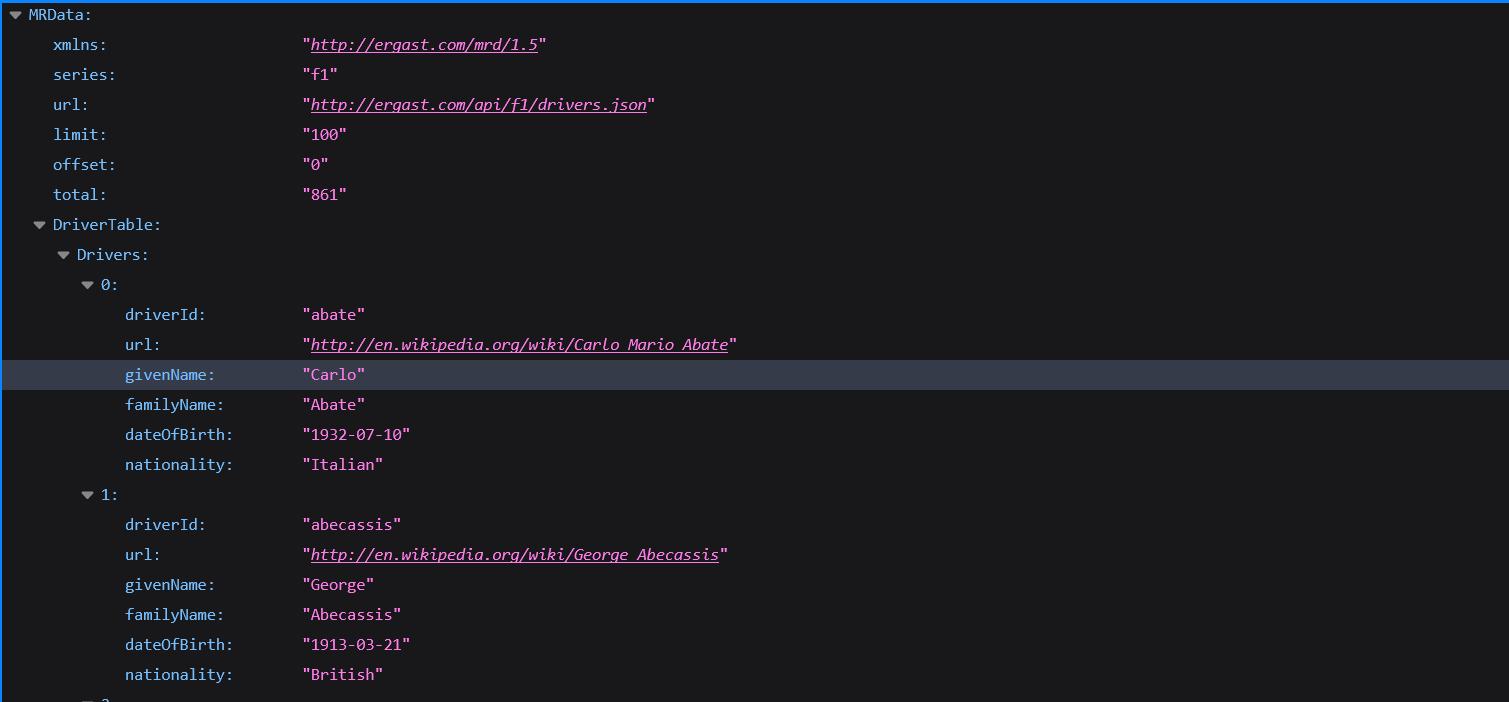

Tiene un limite de datos de 100 registros que puede devolver.

In [ ]:
# Obtener datos
url = "http://ergast.com/api/f1/drivers.json?limit=1000"
data = requests.get(url).json()


drivers = data['MRData']['DriverTable']['Drivers']

df = pd.DataFrame(drivers)

# Mostrar solo nombres y apellidos
#print(df[['givenName', 'familyName', "dateOfBirth", "nationality"]].head())
#print(df[['givenName', 'familyName', "dateOfBirth", "nationality"]])
df

,driverId,url,givenName,familyName,dateOfBirth,nationality,permanentNumber,code
0,abate,http://en.wikipedia.org/wiki/Carlo_Mario_Abate,Carlo,Abate,1932-07-10,Italian,NaN,NaN
1,abecassis,http://en.wikipedia.org/wiki/George_Abecassis,George,Abecassis,1913-03-21,British,NaN,NaN
2,acheson,http://en.wikipedia.org/wiki/Kenny_Acheson,Kenny,Acheson,1957-11-27,British,NaN,NaN
3,adams,http://en.wikipedia.org/wiki/Philippe_Adams,Philippe,Adams,1969-11-19,Belgian,NaN,NaN
4,ader,http://en.wikipedia.org/wiki/Walt_Ader,Walt,Ader,1913-12-15,American,NaN,NaN
...,...,...,...,...,...,...,...,...
95,borgudd,http://en.wikipedia.org/wiki/Slim_Borgudd,Slim,Borgudd,1946-11-25,Swedish,NaN,NaN
96,botha,http://en.wikipedia.org/wiki/Luki_Botha,Luki,Botha,1930-01-16,South African,NaN,NaN
97,bottas,http://en.wikipedia.org/wiki/Valtteri_Bottas,Valtteri,Bottas,1989-08-28,Finnish,77,BOT
98,boullion,http://en.wikipedia.org/wiki/Jean-Christophe_B...,Jean-Christophe,Boullion,1969-12-27,French,NaN,NaN


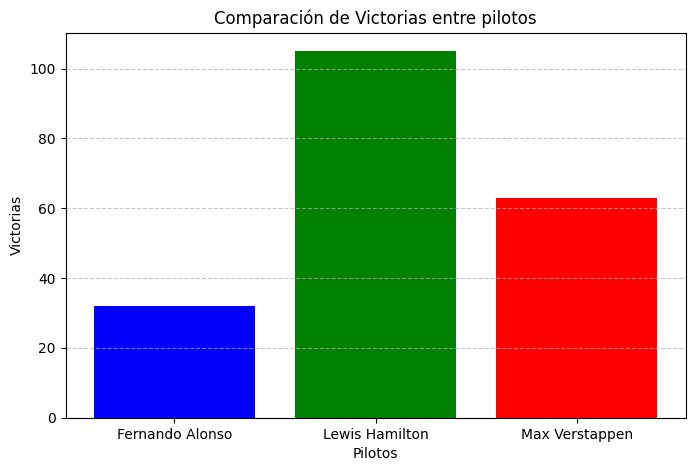

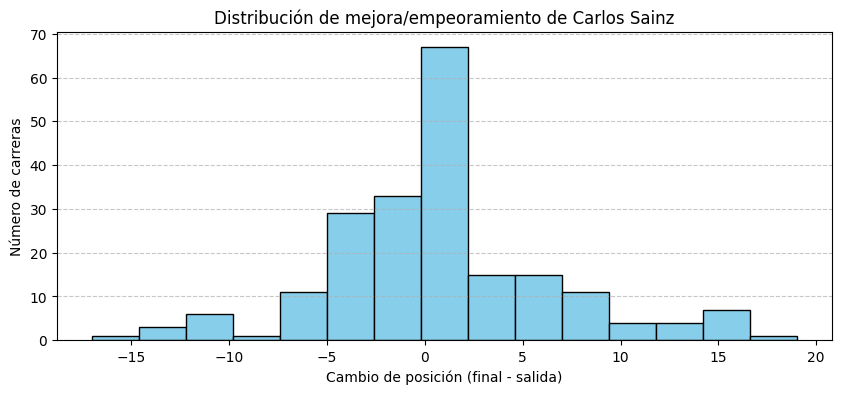

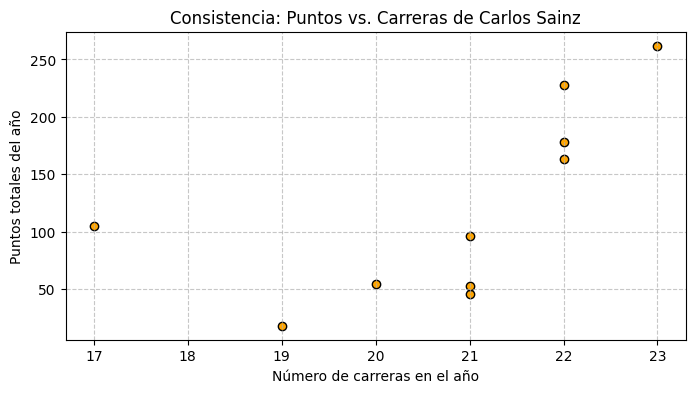

In [2]:
# Importamos las librerías necesarias
import pandas as pd  # Para manejo de datos con DataFrames
import matplotlib.pyplot as plt  # Para crear gráficos

# -----------------------
# 1️⃣ Carga de archivos
# -----------------------

# Cargamos los datos de los pilotos desde un archivo CSV
drivers_df = pd.read_csv('Datos_csv/drivers.csv')  # Dataset de pilotos

# Cargamos los resultados de cada carrera
results_df = pd.read_csv('Datos_csv/results.csv')  # Dataset de resultados finales

# Cargamos los datos de cada carrera
races_df = pd.read_csv('Datos_csv/races.csv')  # Dataset de carreras

# -----------------------
# 2️⃣ Funciones
# -----------------------

# Función para obtener estadísticas de un piloto
def obtener_estadisticas_piloto(nombre_piloto, drivers_df, results_df, races_df, guardar_csv=False):
    # Añadimos columna con nombre completo
    drivers_df['full_name'] = drivers_df['forename'] + ' ' + drivers_df['surname']
    
    # Filtramos la fila del piloto con el nombre dado
    piloto_info = drivers_df[drivers_df['full_name'] == nombre_piloto]
    if piloto_info.empty:
        print(f"No se encontró al piloto: {nombre_piloto}")
        return None
    
    # Obtenemos su driverId
    driver_id = piloto_info.iloc[0]['driverId']
    
    # Filtramos los resultados de ese piloto
    piloto_data = results_df[results_df['driverId'] == driver_id]
    
    # Unimos resultados con datos de la carrera para tener contexto
    piloto_data = piloto_data.merge(races_df, on='raceId', how='left')
    
    # Calculamos el número de victorias
    victorias = (piloto_data['positionOrder'] == 1).sum()
    
    # Calculamos el número de podios
    podios = (piloto_data['positionOrder'].isin([1, 2, 3])).sum()
    
    # Calculamos la suma de puntos totales
    puntos_totales = piloto_data['points'].sum()
    
    # Calculamos los puntos por temporada (agrupando por año)
    puntos_por_temporada = piloto_data.groupby('year')['points'].sum()
    
    # Creamos un diccionario con el resumen de estadísticas
    resumen = {
        'Piloto': nombre_piloto,
        'Victorias': victorias,
        'Podios': podios,
        'Puntos Totales': puntos_totales,
        'Puntos por Temporada': puntos_por_temporada
    }
    
    # Si se pide guardar el CSV, lo creamos
    if guardar_csv:
        resumen_df = piloto_data[['year', 'name', 'grid', 'positionOrder', 'points']]
        resumen_df['position_change'] = resumen_df['positionOrder'] - resumen_df['grid']
        resumen_df.to_csv(f"{nombre_piloto.replace(' ', '_')}_stats.csv", index=False)
        print(f"Archivo {nombre_piloto.replace(' ', '_')}_stats.csv guardado correctamente.")
    
    return resumen

# Función para graficar comparación de pilotos en una métrica
def graficar_comparacion_pilotos(pilotos_nombres, drivers_df, results_df, races_df, metrica='victorias'):
    # Validamos que la métrica sea correcta
    if metrica not in ['victorias', 'podios', 'puntos']:
        print("Métrica no válida. Usa: 'victorias', 'podios' o 'puntos'.")
        return
    
    # Lista para almacenar los valores
    valores = []
    
    # Iteramos sobre cada piloto para calcular sus estadísticas
    for nombre_piloto in pilotos_nombres:
        stats = obtener_estadisticas_piloto(nombre_piloto, drivers_df, results_df, races_df)
        if stats is None:
            continue
        if metrica == 'victorias':
            valores.append(stats['Victorias'])
        elif metrica == 'podios':
            valores.append(stats['Podios'])
        elif metrica == 'puntos':
            valores.append(stats['Puntos Totales'])
    
    # Creamos el gráfico de barras
    plt.figure(figsize=(8, 5))  # Tamaño de la figura
    plt.bar(pilotos_nombres, valores, color=['blue', 'green', 'red'])  # Barras con color
    plt.title(f'Comparación de {metrica.capitalize()} entre pilotos')  # Título
    plt.ylabel(metrica.capitalize())  # Etiqueta eje Y
    plt.xlabel('Pilotos')  # Etiqueta eje X
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas de la cuadrícula
    plt.show()  # Mostramos el gráfico

# Función para analizar la tercera hipótesis
def graficar_tercera_hipotesis(nombre_piloto, drivers_df, results_df, races_df):
    # Creamos la columna 'full_name' para filtrar por nombre completo
    drivers_df['full_name'] = drivers_df['forename'] + ' ' + drivers_df['surname']
    
    # Buscamos la información del piloto
    piloto_info = drivers_df[drivers_df['full_name'] == nombre_piloto]
    if piloto_info.empty:
        print(f"No se encontró al piloto: {nombre_piloto}")
        return
    
    # Obtenemos el driverId
    driver_id = piloto_info.iloc[0]['driverId']
    
    # Filtramos los resultados de ese piloto y unimos con carreras
    piloto_data = results_df[results_df['driverId'] == driver_id].merge(races_df, on='raceId', how='left')
    
    # Convertimos a numérico las columnas necesarias
    piloto_data['grid'] = pd.to_numeric(piloto_data['grid'], errors='coerce')
    piloto_data['positionOrder'] = pd.to_numeric(piloto_data['positionOrder'], errors='coerce')
    
    # Calculamos la diferencia de posición
    piloto_data['position_change'] = piloto_data['positionOrder'] - piloto_data['grid']
    
    # Creamos un histograma de las mejoras/empeoramientos
    plt.figure(figsize=(10, 4))
    plt.hist(piloto_data['position_change'].dropna(), bins=15, edgecolor='black', color='skyblue')
    plt.title(f'Distribución de mejora/empeoramiento de {nombre_piloto}')
    plt.xlabel('Cambio de posición (final - salida)')
    plt.ylabel('Número de carreras')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    # Calculamos carreras y puntos por año
    carreras_por_anio = piloto_data.groupby('year').size()
    puntos_por_anio = piloto_data.groupby('year')['points'].sum()
    
    # Creamos un scatter plot de consistencia
    plt.figure(figsize=(8, 4))
    plt.scatter(carreras_por_anio, puntos_por_anio, color='orange', edgecolor='black')
    plt.title(f'Consistencia: Puntos vs. Carreras de {nombre_piloto}')
    plt.xlabel('Número de carreras en el año')
    plt.ylabel('Puntos totales del año')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# -----------------------
# 3️⃣ Ejecución de ejemplos
# -----------------------

# Gráfico comparativo de victorias de tres pilotos seleccionados
graficar_comparacion_pilotos(
    pilotos_nombres=['Fernando Alonso', 'Lewis Hamilton', 'Max Verstappen'],
    drivers_df=drivers_df,
    results_df=results_df,
    races_df=races_df,
    metrica='victorias'
)

# Análisis de la tercera hipótesis para Carlos Sainz
graficar_tercera_hipotesis(
    nombre_piloto='Carlos Sainz',
    drivers_df=drivers_df,
    results_df=results_df,
    races_df=races_df
)


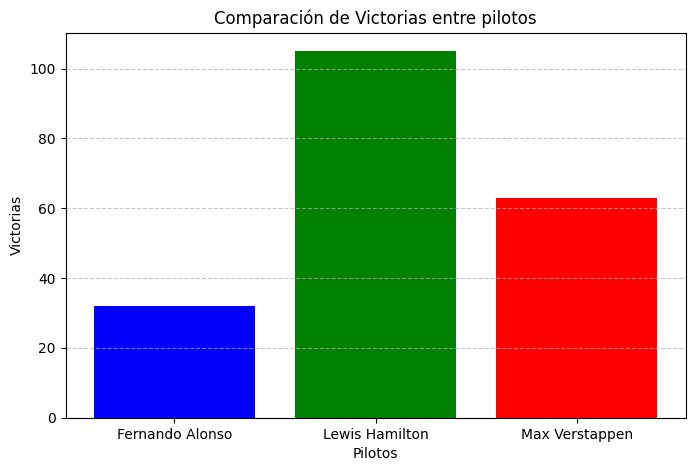

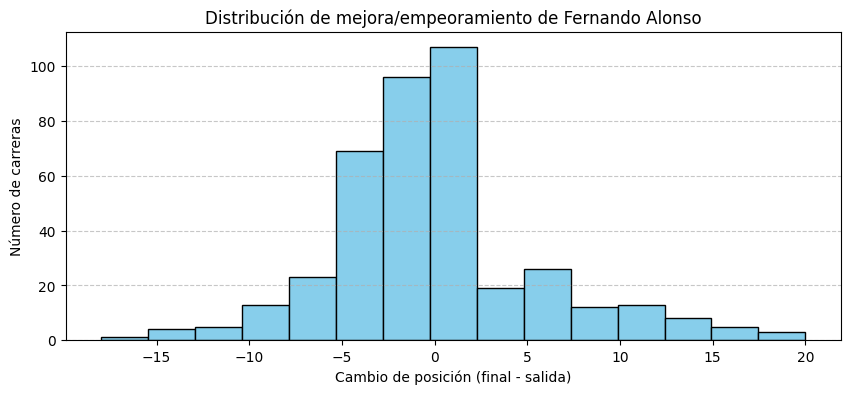

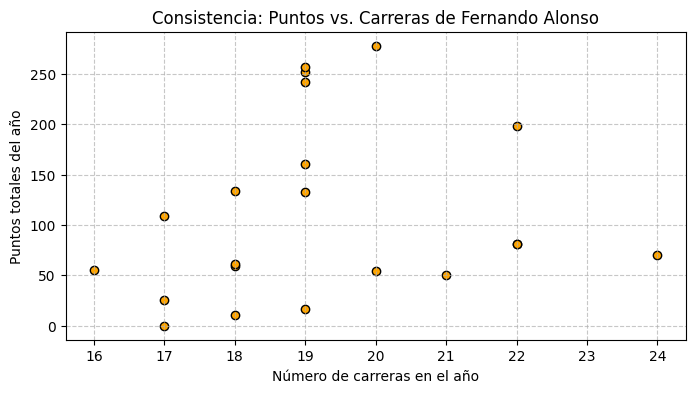

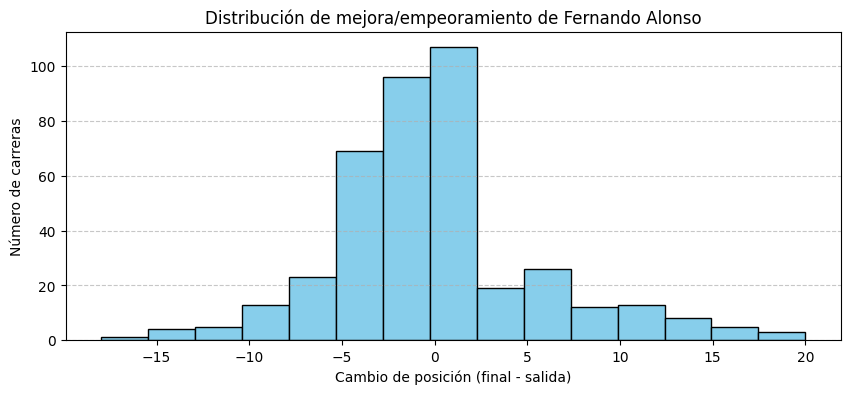

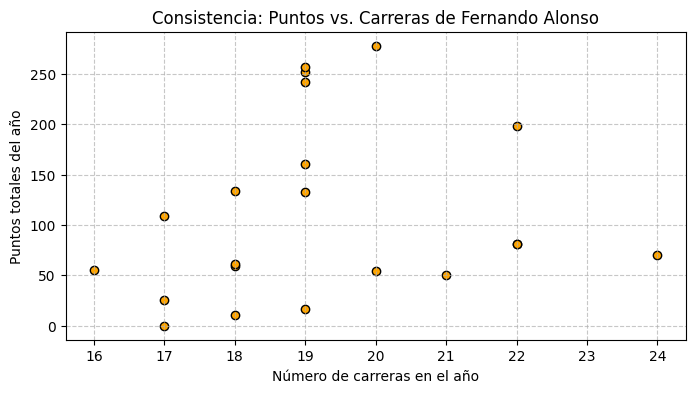

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

drivers_df = pd.read_csv('Datos_csv/drivers.csv')
results_df = pd.read_csv('Datos_csv/results.csv')
races_df = pd.read_csv('Datos_csv/races.csv')


def obtener_estadisticas_piloto(nombre_piloto, drivers_df, results_df, races_df, guardar_csv=False):
    drivers_df['full_name'] = drivers_df['forename'] + ' ' + drivers_df['surname']
    piloto_info = drivers_df[drivers_df['full_name'] == nombre_piloto]
    if piloto_info.empty:
        print(f"No se encontró al piloto: {nombre_piloto}")
        return None
    
    driver_id = piloto_info.iloc[0]['driverId']
    piloto_data = results_df[results_df['driverId'] == driver_id]
    piloto_data = piloto_data.merge(races_df, on='raceId', how='left')
    victorias = (piloto_data['positionOrder'] == 1).sum()
    podios = (piloto_data['positionOrder'].isin([1, 2, 3])).sum()
    puntos_totales = piloto_data['points'].sum()
    puntos_por_temporada = piloto_data.groupby('year')['points'].sum()
    resumen = {
        'Piloto': nombre_piloto,
        'Victorias': victorias,
        'Podios': podios,
        'Puntos Totales': puntos_totales,
        'Puntos por Temporada': puntos_por_temporada
    }
    if guardar_csv:
        resumen_df = piloto_data[['year', 'name', 'grid', 'positionOrder', 'points']]
        #resumen_df['position_change'] = resumen_df['positionOrder'] - resumen_df['grid']
        resumen_df.loc[:, 'position_change'] = resumen_df['positionOrder'] - resumen_df['grid']
        resumen_df.to_csv(f"{nombre_piloto.replace(' ', '_')}_stats.csv", index=False)
        print(f"Archivo {nombre_piloto.replace(' ', '_')}_stats.csv guardado correctamente.")
    return resumen

def graficar_comparacion_pilotos(pilotos_nombres, drivers_df, results_df, races_df, metrica='victorias'):
    if metrica not in ['victorias', 'podios', 'puntos']:
        print("Métrica no válida. Usa: 'victorias', 'podios' o 'puntos'.")
        return
    valores = []
    for nombre_piloto in pilotos_nombres:
        stats = obtener_estadisticas_piloto(nombre_piloto, drivers_df, results_df, races_df)
        if stats is None:
            continue
        if metrica == 'victorias':
            valores.append(stats['Victorias'])
        elif metrica == 'podios':
            valores.append(stats['Podios'])
        elif metrica == 'puntos':
            valores.append(stats['Puntos Totales'])
    plt.figure(figsize=(8, 5))
    plt.bar(pilotos_nombres, valores, color=['blue', 'green', 'red'])
    plt.title(f'Comparación de {metrica.capitalize()} entre pilotos')
    plt.ylabel(metrica.capitalize())
    plt.xlabel('Pilotos')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

def graficar_tercera_hipotesis(nombre_piloto, drivers_df, results_df, races_df):
    drivers_df['full_name'] = drivers_df['forename'] + ' ' + drivers_df['surname']
    piloto_info = drivers_df[drivers_df['full_name'] == nombre_piloto]
    if piloto_info.empty:
        print(f"No se encontró al piloto: {nombre_piloto}")
        return
    driver_id = piloto_info.iloc[0]['driverId']
    piloto_data = results_df[results_df['driverId'] == driver_id].merge(races_df, on='raceId', how='left')
    piloto_data['grid'] = pd.to_numeric(piloto_data['grid'], errors='coerce')
    piloto_data['positionOrder'] = pd.to_numeric(piloto_data['positionOrder'], errors='coerce')
    piloto_data['position_change'] = piloto_data['positionOrder'] - piloto_data['grid']
    plt.figure(figsize=(10, 4))
    plt.hist(piloto_data['position_change'].dropna(), bins=15, edgecolor='black', color='skyblue')
    plt.title(f'Distribución de mejora/empeoramiento de {nombre_piloto}')
    plt.xlabel('Cambio de posición (final - salida)')
    plt.ylabel('Número de carreras')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    carreras_por_anio = piloto_data.groupby('year').size()
    puntos_por_anio = piloto_data.groupby('year')['points'].sum()
    plt.figure(figsize=(8, 4))
    plt.scatter(carreras_por_anio, puntos_por_anio, color='orange', edgecolor='black')
    plt.title(f'Consistencia: Puntos vs. Carreras de {nombre_piloto}')
    plt.xlabel('Número de carreras en el año')
    plt.ylabel('Puntos totales del año')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Finalmente ejecutamos los ejemplos solicitados
graficar_comparacion_pilotos(
    pilotos_nombres=['Fernando Alonso', 'Lewis Hamilton', 'Max Verstappen'],
    drivers_df=drivers_df,
    results_df=results_df,
    races_df=races_df,
    metrica='victorias'
)

graficar_tercera_hipotesis(
    nombre_piloto='Fernando Alonso',
    drivers_df=drivers_df,
    results_df=results_df,
    races_df=races_df
)

graficar_tercera_hipotesis(
    nombre_piloto='Fernando Alonso',
    drivers_df=drivers_df,
    results_df=results_df,
    races_df=races_df
)

PARA CADA PILOTO, SACAR LOS STATS POR DRIVERID

In [8]:
def obtener_estadisticas_piloto_por_id(driver_id, drivers_df, results_df, races_df, guardar_csv=False):
    # Buscamos la fila del piloto con ese ID
    piloto_info = drivers_df[drivers_df['driverId'] == driver_id]
    if piloto_info.empty:
        print(f"No se encontró el piloto con driverId: {driver_id}")
        return None
    
    # Obtenemos el nombre completo del piloto
    nombre_piloto = piloto_info.iloc[0]['forename'] + ' ' + piloto_info.iloc[0]['surname']
    
    # Filtramos los resultados de este piloto
    piloto_data = results_df[results_df['driverId'] == driver_id]
    
    # Unimos resultados con datos de carreras
    piloto_data = piloto_data.merge(races_df, on='raceId', how='left')
    
    # Calculamos estadísticas
    victorias = (piloto_data['positionOrder'] == 1).sum()
    podios = (piloto_data['positionOrder'].isin([1, 2, 3])).sum()
    puntos_totales = piloto_data['points'].sum()
    puntos_por_temporada = piloto_data.groupby('year')['points'].sum()
    
    # Creamos el resumen
    resumen = {
        'Piloto': nombre_piloto,
        'Victorias': victorias,
        'Podios': podios,
        'Puntos Totales': puntos_totales,
        'Puntos por Temporada': puntos_por_temporada
    }
    
    # Opcional: guardar CSV con los datos
    if guardar_csv:
        resumen_df = piloto_data[['year', 'name', 'grid', 'positionOrder', 'points']]
        resumen_df['position_change'] = resumen_df['positionOrder'] - resumen_df['grid']
        resumen_df.to_csv(f"{nombre_piloto.replace(' ', '_')}_stats_by_id.csv", index=False)
        print(f"Archivo {nombre_piloto.replace(' ', '_')}_stats_by_id.csv guardado correctamente.")
    
    #return resumen

# Ejemplo de uso:
stats = obtener_estadisticas_piloto_por_id(15, drivers_df, results_df, races_df, guardar_csv=True)
print(stats)


Archivo Jarno_Trulli_stats_by_id.csv guardado correctamente.
None


C:\Users\Ira\AppData\Local\Temp\ipykernel_2752\2598138063.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resumen_df['position_change'] = resumen_df['positionOrder'] - resumen_df['grid']


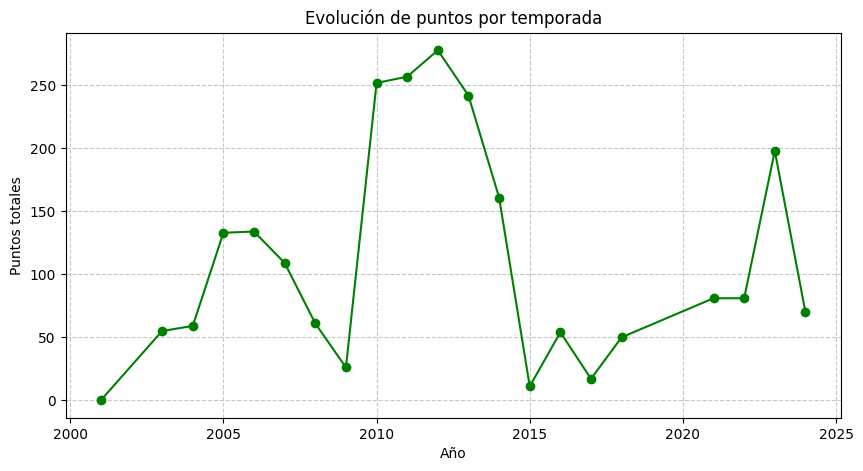

📊 1️⃣ Gráfico de Evolución de puntos por temporada

👉 ¿Qué muestra?

    Una línea que conecta los puntos obtenidos cada temporada.

    Eje X = Año de la temporada.

    Eje Y = Puntos totales logrados ese año.

👉 ¿Qué puedes interpretar?

    Tendencias de rendimiento: ver si el piloto tuvo temporadas muy buenas o bajas.

    ¿Fue un piloto consistente o tuvo altibajos?


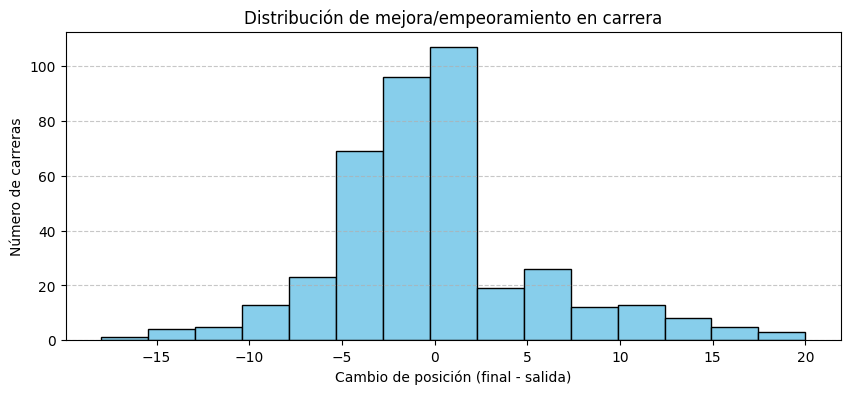

📊 2️⃣ Histograma de mejoras/empeoramientos

👉 ¿Qué muestra?

    Un histograma (gráfico de barras) con la cantidad de carreras que tuvo un cierto cambio de posición.

    Eje X = Cambios de posición en cada carrera (final - salida).

    Eje Y = Número de carreras.

👉 ¿Qué puedes interpretar?

    Si las barras están más a la izquierda de cero = el piloto suele mejorar posiciones en carrera.

    Si están a la derecha = suele perder posiciones.

    Si se concentran en cero = es consistente (termina en la misma posición en la que parte).


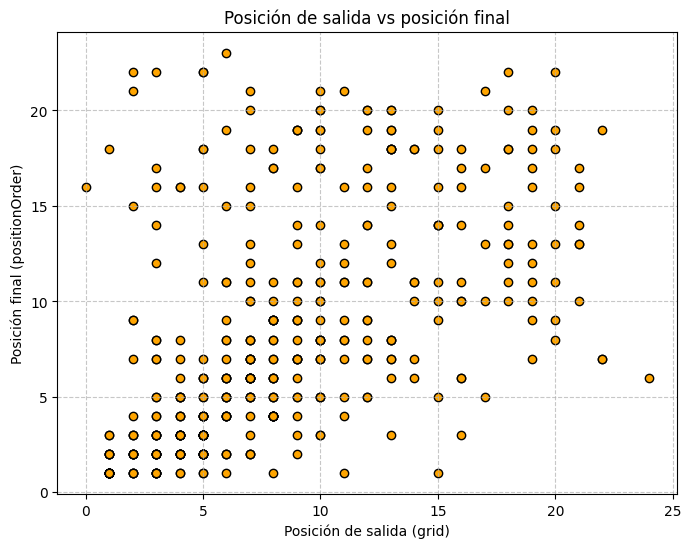

📊 3️⃣ Scatter plot de posición de salida vs posición final

👉 ¿Qué muestra?

    Un diagrama de dispersión: cada punto es una carrera.

    Eje X = posición en la parrilla de salida (grid).

    Eje Y = posición final en carrera.

👉 ¿Qué puedes interpretar?

    Los puntos cerca de la diagonal (X=Y) = el piloto termina donde parte.

    Los puntos por debajo = mejora posiciones.

    Los puntos por arriba = pierde posiciones.


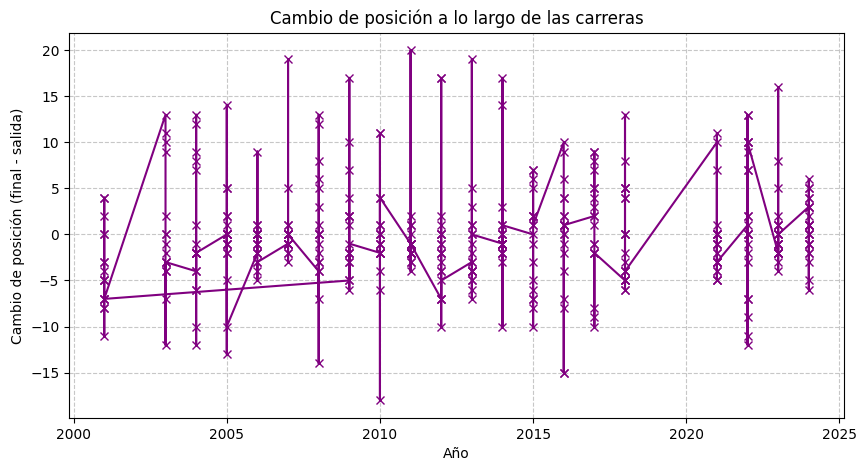

📊 4️⃣ Evolución de la diferencia de posición a lo largo del tiempo

👉 ¿Qué muestra?

    Una línea que conecta el cambio de posición en cada carrera a lo largo de los años.

    Eje X = Año de la carrera.

    Eje Y = Diferencia de posición (posición final - posición de salida).

👉 ¿Qué puedes interpretar?

    Ves si hay patrones de mejora o de pérdidas a lo largo del tiempo.

    Identificar épocas en las que era más agresivo y remontaba más.


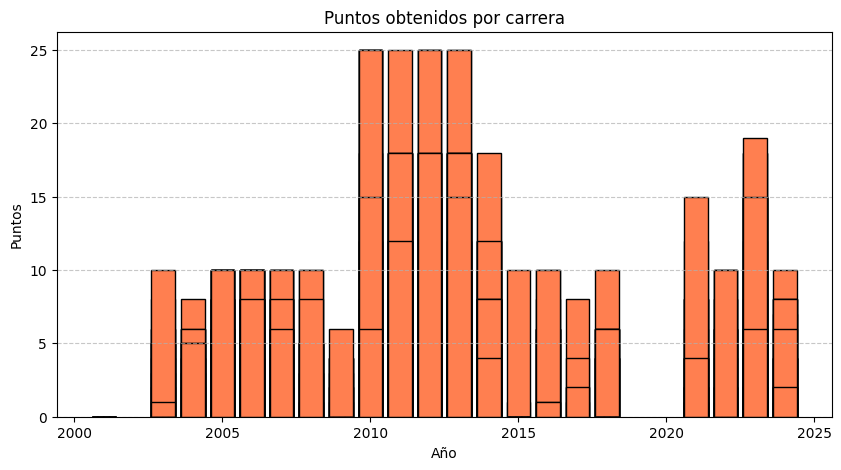

📊 5️⃣ Puntos por carrera a lo largo de los años

👉 ¿Qué muestra?

    Un gráfico de barras con los puntos conseguidos en cada carrera (organizado por año).

    Eje X = Año.

    Eje Y = Puntos logrados.

👉 ¿Qué puedes interpretar?

    Cuánto aportaba en cada carrera a su total de temporada.

    Identificar carreras clave o temporadas dominantes.


In [16]:
# Cargamos el archivo CSV del piloto que pasaste
import pandas as pd
import matplotlib.pyplot as plt

# Leemos el CSV con los datos de Fernando Alonso generados por el script
piloto_df = pd.read_csv('Fernando_Alonso_stats_by_id.csv')

# Convertimos a numérico por si hay valores no numéricos
piloto_df['grid'] = pd.to_numeric(piloto_df['grid'], errors='coerce')
piloto_df['positionOrder'] = pd.to_numeric(piloto_df['positionOrder'], errors='coerce')
piloto_df['position_change'] = pd.to_numeric(piloto_df['position_change'], errors='coerce')
piloto_df['points'] = pd.to_numeric(piloto_df['points'], errors='coerce')

# -----------------------------
# 📊 Gráfico 1: Evolución de puntos por temporada
# -----------------------------
puntos_por_temporada = piloto_df.groupby('year')['points'].sum()
plt.figure(figsize=(10, 5))
plt.plot(puntos_por_temporada.index, puntos_por_temporada.values, marker='o', color='green')
plt.title('Evolución de puntos por temporada')
plt.xlabel('Año')
plt.ylabel('Puntos totales')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
print('''📊 1️⃣ Gráfico de Evolución de puntos por temporada

👉 ¿Qué muestra?

    Una línea que conecta los puntos obtenidos cada temporada.

    Eje X = Año de la temporada.

    Eje Y = Puntos totales logrados ese año.

👉 ¿Qué puedes interpretar?

    Tendencias de rendimiento: ver si el piloto tuvo temporadas muy buenas o bajas.

    ¿Fue un piloto consistente o tuvo altibajos?''')

# -----------------------------
# 📊 Gráfico 2: Histograma de mejoras/empeoramientos
# -----------------------------
plt.figure(figsize=(10, 4))
plt.hist(piloto_df['position_change'].dropna(), bins=15, edgecolor='black', color='skyblue')
plt.title('Distribución de mejora/empeoramiento en carrera')
plt.xlabel('Cambio de posición (final - salida)')
plt.ylabel('Número de carreras')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print('''📊 2️⃣ Histograma de mejoras/empeoramientos

👉 ¿Qué muestra?

    Un histograma (gráfico de barras) con la cantidad de carreras que tuvo un cierto cambio de posición.

    Eje X = Cambios de posición en cada carrera (final - salida).

    Eje Y = Número de carreras.

👉 ¿Qué puedes interpretar?

    Si las barras están más a la izquierda de cero = el piloto suele mejorar posiciones en carrera.

    Si están a la derecha = suele perder posiciones.

    Si se concentran en cero = es consistente (termina en la misma posición en la que parte).''')
# -----------------------------
# 📊 Gráfico 3: Scatter plot de posición de salida vs posición final
# -----------------------------
plt.figure(figsize=(8, 6))
plt.scatter(piloto_df['grid'], piloto_df['positionOrder'], color='orange', edgecolor='black')
plt.title('Posición de salida vs posición final')
plt.xlabel('Posición de salida (grid)')
plt.ylabel('Posición final (positionOrder)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
print('''📊 3️⃣ Scatter plot de posición de salida vs posición final

👉 ¿Qué muestra?

    Un diagrama de dispersión: cada punto es una carrera.

    Eje X = posición en la parrilla de salida (grid).

    Eje Y = posición final en carrera.

👉 ¿Qué puedes interpretar?

    Los puntos cerca de la diagonal (X=Y) = el piloto termina donde parte.

    Los puntos por debajo = mejora posiciones.

    Los puntos por arriba = pierde posiciones.''')

# -----------------------------
# 📊 Gráfico 4: Evolución de la diferencia de posición a lo largo del tiempo
# -----------------------------
plt.figure(figsize=(10, 5))
plt.plot(piloto_df['year'], piloto_df['position_change'], marker='x', linestyle='-', color='purple')
plt.title('Cambio de posición a lo largo de las carreras')
plt.xlabel('Año')
plt.ylabel('Cambio de posición (final - salida)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
print('''📊 4️⃣ Evolución de la diferencia de posición a lo largo del tiempo

👉 ¿Qué muestra?

    Una línea que conecta el cambio de posición en cada carrera a lo largo de los años.

    Eje X = Año de la carrera.

    Eje Y = Diferencia de posición (posición final - posición de salida).

👉 ¿Qué puedes interpretar?

    Ves si hay patrones de mejora o de pérdidas a lo largo del tiempo.

    Identificar épocas en las que era más agresivo y remontaba más.''')

# -----------------------------
# 📊 Gráfico 5: Puntos por carrera a lo largo de los años
# -----------------------------
plt.figure(figsize=(10, 5))
plt.bar(piloto_df['year'], piloto_df['points'], color='coral', edgecolor='black')
plt.title('Puntos obtenidos por carrera')
plt.xlabel('Año')
plt.ylabel('Puntos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print('''📊 5️⃣ Puntos por carrera a lo largo de los años

👉 ¿Qué muestra?

    Un gráfico de barras con los puntos conseguidos en cada carrera (organizado por año).

    Eje X = Año.

    Eje Y = Puntos logrados.

👉 ¿Qué puedes interpretar?

    Cuánto aportaba en cada carrera a su total de temporada.

    Identificar carreras clave o temporadas dominantes.''')



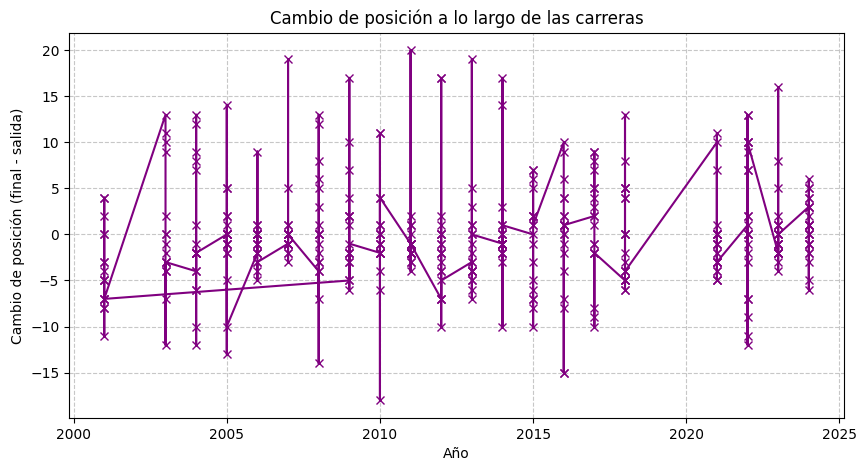

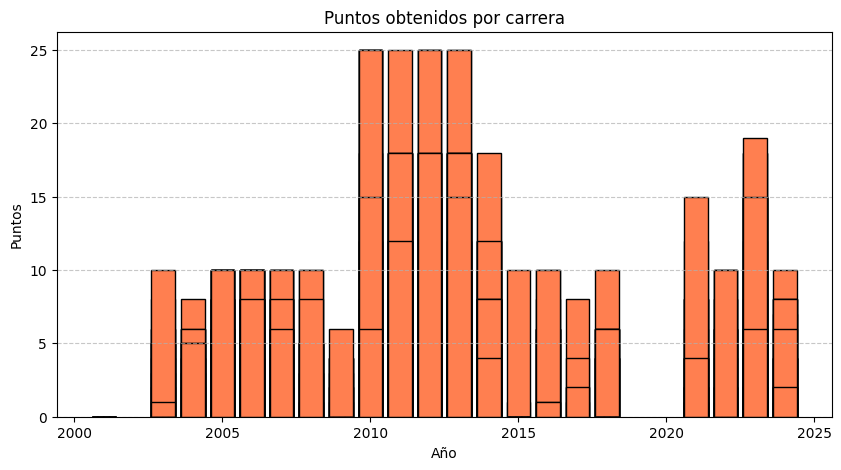

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga el archivo CSV generado (aquí Fernando Alonso como ejemplo)
piloto_df = pd.read_csv('Fernando_Alonso_stats_by_id.csv')

# Limpia y convierte columnas
piloto_df['grid'] = pd.to_numeric(piloto_df['grid'], errors='coerce')
piloto_df['positionOrder'] = pd.to_numeric(piloto_df['positionOrder'], errors='coerce')
piloto_df['position_change'] = pd.to_numeric(piloto_df['position_change'], errors='coerce')
piloto_df['points'] = pd.to_numeric(piloto_df['points'], errors='coerce')

# Nombre del piloto para los archivos
nombre_piloto = 'Fernando_Alonso'

# Gráfico 1: Evolución de puntos por temporada
puntos_por_temporada = piloto_df.groupby('year')['points'].sum()
plt.figure(figsize=(10, 5))
plt.plot(puntos_por_temporada.index, puntos_por_temporada.values, marker='o', color='green')
plt.title('Evolución de puntos por temporada')
plt.xlabel('Año')
plt.ylabel('Puntos totales')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(f'puntos_por_temporada_{nombre_piloto}.png')
plt.close()

# Gráfico 2: Histograma de mejoras/empeoramientos
plt.figure(figsize=(10, 4))
plt.hist(piloto_df['position_change'].dropna(), bins=15, edgecolor='black', color='skyblue')
plt.title('Distribución de mejora/empeoramiento en carrera')
plt.xlabel('Cambio de posición (final - salida)')
plt.ylabel('Número de carreras')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(f'histograma_mejora_empeoramiento_{nombre_piloto}.png')
plt.close()

# Gráfico 3: Scatter plot de posición de salida vs posición final
plt.figure(figsize=(8, 6))
plt.scatter(piloto_df['grid'], piloto_df['positionOrder'], color='orange', edgecolor='black')
plt.title('Posición de salida vs posición final')
plt.xlabel('Posición de salida (grid)')
plt.ylabel('Posición final (positionOrder)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(f'scatter_salida_vs_final_{nombre_piloto}.png')
plt.close()

# Gráfico 4: Evolución de la diferencia de posición a lo largo del tiempo
plt.figure(figsize=(10, 5))
plt.plot(piloto_df['year'], piloto_df['position_change'], marker='x', linestyle='-', color='purple')
plt.title('Cambio de posición a lo largo de las carreras')
plt.xlabel('Año')
plt.ylabel('Cambio de posición (final - salida)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(f'evolucion_cambio_posicion_{nombre_piloto}.png')
plt.show()

# Gráfico 5: Puntos por carrera
plt.figure(figsize=(10, 5))
plt.bar(piloto_df['year'], piloto_df['points'], color='coral', edgecolor='black')
plt.title('Puntos obtenidos por carrera')
plt.xlabel('Año')
plt.ylabel('Puntos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(f'puntos_por_carrera_{nombre_piloto}.png')
plt.show()


no ejecutado

In [ ]:
# Vuelvo a cargar el CSV del piloto para generar y guardar los gráficos con su nombre incluido
import pandas as pd
import matplotlib.pyplot as plt

# Nombre del archivo CSV
file_path = 'Datos_csv/Fernando_Alonso_stats_by_id.csv'
piloto_df = pd.read_csv(file_path)

# Extraemos el nombre del piloto desde el nombre del archivo (ej: "Fernando_Alonso")
nombre_piloto = file_path.split('/')[-1].replace('_stats_by_id.csv', '')

# Aseguramos que las columnas clave sean numéricas
piloto_df['grid'] = pd.to_numeric(piloto_df['grid'], errors='coerce')
piloto_df['positionOrder'] = pd.to_numeric(piloto_df['positionOrder'], errors='coerce')
piloto_df['position_change'] = pd.to_numeric(piloto_df['position_change'], errors='coerce')
piloto_df['points'] = pd.to_numeric(piloto_df['points'], errors='coerce')

# 1. Evolución de puntos por temporada
puntos_por_temporada = piloto_df.groupby('year')['points'].sum()
plt.figure(figsize=(10, 5))
plt.plot(puntos_por_temporada.index, puntos_por_temporada.values, marker='o', color='green')
plt.title('Evolución de puntos por temporada')
plt.xlabel('Año')
plt.ylabel('Puntos totales')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(f'/mnt/data/{nombre_piloto}_puntos_por_temporada.png')
plt.close()

# 2. Histograma de mejoras/empeoramientos
plt.figure(figsize=(10, 4))
plt.hist(piloto_df['position_change'].dropna(), bins=15, edgecolor='black', color='skyblue')
plt.title('Distribución de mejora/empeoramiento en carrera')
plt.xlabel('Cambio de posición (final - salida)')
plt.ylabel('Número de carreras')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(f'/mnt/data/{nombre_piloto}_histograma_mejora_empeoramiento.png')
plt.close()

# 3. Scatter plot posición de salida vs posición final
plt.figure(figsize=(8, 6))
plt.scatter(piloto_df['grid'], piloto_df['positionOrder'], color='orange', edgecolor='black')
plt.title('Posición de salida vs posición final')
plt.xlabel('Posición de salida (grid)')
plt.ylabel('Posición final (positionOrder)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(f'/mnt/data/{nombre_piloto}_scatter_salida_vs_final.png')
plt.close()

# 4. Evolución del cambio de posición
plt.figure(figsize=(10, 5))
plt.plot(piloto_df['year'], piloto_df['position_change'], marker='x', linestyle='-', color='purple')
plt.title('Cambio de posición a lo largo de las carreras')
plt.xlabel('Año')
plt.ylabel('Cambio de posición (final - salida)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(f'/mnt/data/{nombre_piloto}_evolucion_cambio_posicion.png')
plt.close()

# 5. Puntos por carrera
plt.figure(figsize=(10, 5))
plt.bar(piloto_df['year'], piloto_df['points'], color='coral', edgecolor='black')
plt.title('Puntos obtenidos por carrera')
plt.xlabel('Año')
plt.ylabel('Puntos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(f'/mnt/data/{nombre_piloto}_puntos_por_carrera.png')
plt.close()

# Listamos los archivos generados
import os
output_files = [f for f in os.listdir('/mnt/data') if f.startswith(nombre_piloto) and f.endswith('.png')]
output_files
